In [1]:
##loading data set

In [2]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D,BatchNormalization,Flatten

In [3]:
import numpy as np
import pandas as pd

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dog_breeds',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =  30,
    image_size=(300,300)
)

Found 951 files belonging to 10 classes.


In [5]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
class_names = train_ds.class_names
for label, class_name in enumerate(class_names):
    print(f"Label: {label} - Class Name: {class_name}")


Label: 0 - Class Name: Beagle
Label: 1 - Class Name: Boxer
Label: 2 - Class Name: Bulldog
Label: 3 - Class Name: Dachshund
Label: 4 - Class Name: German_Shepherd
Label: 5 - Class Name: Golden_Retriever
Label: 6 - Class Name: Labrador_Retriever
Label: 7 - Class Name: Poodle
Label: 8 - Class Name: Rottweiler
Label: 9 - Class Name: Yorkshire_Terrier


In [8]:
from sklearn.model_selection import train_test_split
# Convert the `tf.data.Dataset` to a list of batches
batches = list(train_ds.as_numpy_iterator())
# Combine the batches into a single dataset
images, labels = zip(*batches)
images = np.concatenate(images)
labels = np.concatenate(labels)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Convert the numpy arrays back into `tf.data.Dataset`
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Batch the datasets
train_data = train_data.batch(30)
test_data = test_data.batch(30)


In [10]:
#normalizing my image rgb values
def normal(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_data.map(normal)
test_ds = test_data.map(normal)

In [11]:
train_ds,test_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

### Model building

In [12]:
model = Sequential()

In [13]:
#defining layers
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(300,300,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 298, 298, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 147, 147, 64)      256       
 chNormalization)                                                
                                                        

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
import os

In [17]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
#callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [18]:
model.fit(train_ds,epochs = 50,callbacks=[cp_callback],validation_data=test_ds)

Epoch 1/50
26/26 [==============================] - ETA: 0s - loss: 10.0932 - accuracy: 0.2487
Epoch 1: saving model to training_1/cp.ckpt
26/26 [==============================] - 17s 291ms/step - loss: 10.0932 - accuracy: 0.2487 - val_loss: 7.2292 - val_accuracy: 0.1675
Epoch 2/50
25/26 [===========================>..] - ETA: 0s - loss: 4.6250 - accuracy: 0.3840
Epoch 2: saving model to training_1/cp.ckpt
26/26 [==============================] - 4s 161ms/step - loss: 4.6414 - accuracy: 0.3829 - val_loss: 13.8565 - val_accuracy: 0.1099
Epoch 3/50
25/26 [===========================>..] - ETA: 0s - loss: 3.4745 - accuracy: 0.4707
Epoch 3: saving model to training_1/cp.ckpt
26/26 [==============================] - 5s 179ms/step - loss: 3.4742 - accuracy: 0.4711 - val_loss: 20.6172 - val_accuracy: 0.1099
Epoch 4/50
25/26 [===========================>..] - ETA: 0s - loss: 2.2594 - accuracy: 0.5840
Epoch 4: saving model to training_1/cp.ckpt
26/26 [==============================] - 5s 191ms/

In [19]:
model.save("Dog_Classifier_model.keras")

In [20]:
new_model = tf.keras.models.load_model('Dog_Classifier_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 298, 298, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 147, 147, 64)      256       
 chNormalization)                                                
                                                        

In [21]:
new_model.get_weights()

[array([[[[-1.14342719e-01, -1.32997138e-02,  9.27136689e-02,
           -2.45862436e-02, -5.16133644e-02, -1.34944364e-01,
            8.89815018e-02, -5.10412492e-02, -2.30660867e-02,
           -2.85553448e-02,  1.26530334e-01, -1.41698951e-02,
           -8.57928693e-02,  3.10473945e-02, -1.41447373e-02,
           -4.76002395e-02,  2.35041939e-02, -6.83993706e-03,
           -1.28116339e-01, -3.23189199e-02, -6.62459135e-02,
           -6.14028759e-02, -8.38736538e-04,  3.81807499e-02,
           -1.09812953e-01,  6.36148527e-02,  9.49582458e-02,
            1.04012251e-01, -2.82763354e-02,  1.31475791e-01,
            6.95761144e-02, -7.64805526e-02],
          [-2.10113022e-02, -3.91999260e-02,  1.07517913e-01,
            1.15956873e-01,  5.42876078e-03, -1.31478220e-01,
           -8.49256366e-02,  2.36298572e-02,  1.45336837e-01,
            8.39435607e-02,  9.51772183e-02,  1.92575052e-01,
            9.51844305e-02, -2.92967376e-03, -2.26144176e-02,
           -2.68342011e-

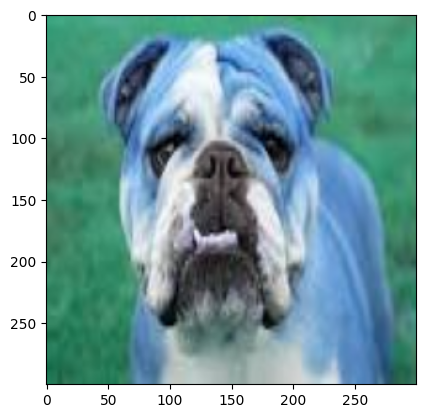

In [47]:
img_dog = cv2.imread('Bulldog_10.jpg')
test_img = cv2.resize(img_dog,(300,300))
test_input = test_img.reshape((1,300,300,3))
plt.imshow(test_img)

In [48]:
test_image = tf.cast(test_input/255. ,tf.float32)

In [49]:
np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 19ms/step


2

Label: 0 - Class Name: Beagle

1.   Label: 1 - Class Name: Boxer
2.   Label: 2 - Class Name: Bulldog
3.   Label: 3 - Class Name: Dachshund
4.   Label: 4 - Class Name: German_Shepherd
5.   Label: 5 - Class Name: Golden_Retriever
6.   Label: 6 - Class Name: Labrador_Retriever
7.   Label: 7 - Class Name: Poodle
8.   Label: 8 - Class Name: Rottweiler
9.   Label: 9 - Class Name: Yorkshire_Terrier










